In [54]:
# --- 0. Import Libraries

import numpy as np
from scipy.stats import mode
import sys
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
sys.path.append('/Users/sooyoungkim/Desktop/kNN')
from helper import *
import os

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.7.4


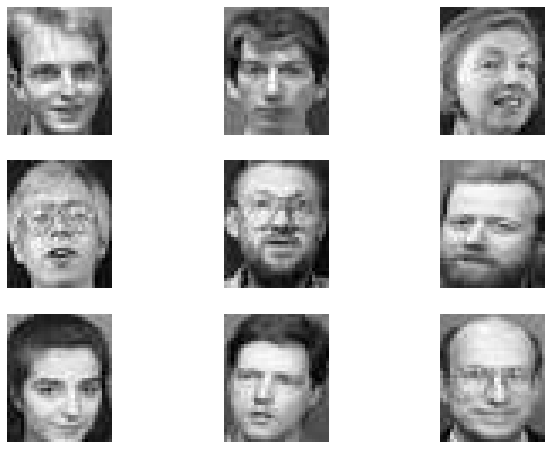

In [55]:
# --- 1. Data Loading

xTr,yTr,xTe,yTe=loaddata("faces.mat")

# Visualizing the data (first 10 ten training images)
%matplotlib inline
plt.figure(figsize=(11,8))
plotfaces(xTr[:9, :])

In [56]:
# --- 2. Implement k-NN for Facial Recognition

# findknn will find the k nearest neighbors of a set of vectors within the training data set
def findknn(xTr,xTe,k):
    D = l2distance(xTr, xTe)
    indices = np.argsort(D, axis=0)
    dists = np.sort(D, axis=0)
    return indices[:k,:], dists[:k,:]

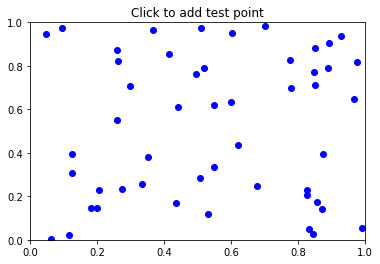

In [57]:
%matplotlib inline
visualize_knn_2D(findknn)

/Users/sooyoungkim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/sooyoungkim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/sooyoungkim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previ

Click on the images above, to cycle through the test images.


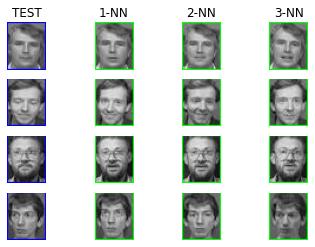

In [58]:
%matplotlib inline
visualize_knn_images(findknn, imageType='faces')

In [59]:
# --- 3. Implement accuracy

# The function accuracy will compute the accuracy of a classifier
def accuracy(truth,preds):
    truth = truth.flatten()
    preds = preds.flatten()
    if len(truth) == 0 and len(preds) == 0:
        output = 0
        return output
    return np.mean(truth == preds)

In [60]:
# --- 4. Implement knnclassifier

# The function knnclassifier will perform k nearest neighbor classification on the test data set
def knnclassifier(xTr,yTr,xTe,k):
    yTr = yTr.flatten()
    inds, _ = findknn_grader(xTr, xTe, k)
    m, d = xTe.shape
    vs = yTr[inds]
    preds = np.array([mode(vs[:,i])[0] for i in range(m)]).flatten()
    return preds

In [61]:
# --- 5. Calculate accuracy

# Runs the k-nearest neighbor classifer over the faces and digit data set

print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=accuracy(yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
You obtained 95.83% classification acccuracy in 0.0609 seconds

